In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
all_df = pd.read_csv("./data/owid-covid-data.csv")
all_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402727,ZWE,Africa,Zimbabwe,2024-05-15,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402728,ZWE,Africa,Zimbabwe,2024-05-16,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402729,ZWE,Africa,Zimbabwe,2024-05-17,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402730,ZWE,Africa,Zimbabwe,2024-05-18,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402732 entries, 0 to 402731
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402732 non-null  object 
 1   continent                                   383465 non-null  object 
 2   location                                    402732 non-null  object 
 3   date                                        402732 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [6]:
# 원하는 열 리스트
need_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']
ndf = all_df[need_columns]
ndf

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-05,NaN,41128772.0
1,AFG,Afghanistan,2020-01-06,NaN,41128772.0
2,AFG,Afghanistan,2020-01-07,NaN,41128772.0
3,AFG,Afghanistan,2020-01-08,NaN,41128772.0
4,AFG,Afghanistan,2020-01-09,NaN,41128772.0
...,...,...,...,...,...
402727,ZWE,Zimbabwe,2024-05-15,266362.0,16320539.0
402728,ZWE,Zimbabwe,2024-05-16,266362.0,16320539.0
402729,ZWE,Zimbabwe,2024-05-17,266362.0,16320539.0
402730,ZWE,Zimbabwe,2024-05-18,266362.0,16320539.0


In [7]:
# location 속성 확인
locations = ndf['location']
locations

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
402727       Zimbabwe
402728       Zimbabwe
402729       Zimbabwe
402730       Zimbabwe
402731       Zimbabwe
Name: location, Length: 402732, dtype: object

In [8]:
# unique() : 중복 데이터 없이 유일한 값을 가져오기 위한 메소드
# locations 안에 뭐뭐가 있나 확인
locations.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [10]:
# 대한민국 데이터 확인
kdf = ndf[ndf.location == 'South Korea']
kdf

,iso_code,location,date,total_cases,population
336276,KOR,South Korea,2020-01-05,NaN,51815808.0
336277,KOR,South Korea,2020-01-06,NaN,51815808.0
336278,KOR,South Korea,2020-01-07,NaN,51815808.0
336279,KOR,South Korea,2020-01-08,NaN,51815808.0
336280,KOR,South Korea,2020-01-09,NaN,51815808.0
...,...,...,...,...,...
337868,KOR,South Korea,2024-05-15,34571873.0,51815808.0
337869,KOR,South Korea,2024-05-16,34571873.0,51815808.0
337870,KOR,South Korea,2024-05-17,34571873.0,51815808.0
337871,KOR,South Korea,2024-05-18,34571873.0,51815808.0


In [11]:
# set_index() date를 인덱스로
kdf = kdf.set_index('date')
kdf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,KOR,South Korea,NaN,51815808.0
2020-01-06,KOR,South Korea,NaN,51815808.0
2020-01-07,KOR,South Korea,NaN,51815808.0
2020-01-08,KOR,South Korea,NaN,51815808.0
2020-01-09,KOR,South Korea,NaN,51815808.0
...,...,...,...,...
2024-05-15,KOR,South Korea,34571873.0,51815808.0
2024-05-16,KOR,South Korea,34571873.0,51815808.0
2024-05-17,KOR,South Korea,34571873.0,51815808.0


In [12]:
# 미국 데이터 생성
udf = ndf[ndf.location == 'United States']

# 인덱스를 date로 변경
udf = udf.set_index('date')

# 확인
udf

,iso_code,location,total_cases,population
date,,,,
2020-01-05,USA,United States,NaN,338289856.0
2020-01-06,USA,United States,NaN,338289856.0
2020-01-07,USA,United States,NaN,338289856.0
2020-01-08,USA,United States,NaN,338289856.0
2020-01-09,USA,United States,NaN,338289856.0
...,...,...,...,...
2024-05-15,USA,United States,103436829.0,338289856.0
2024-05-16,USA,United States,103436829.0,338289856.0
2024-05-17,USA,United States,103436829.0,338289856.0


In [15]:
# total cases확인
ktc = kdf['total_cases']
ktc

date
2020-01-05           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
                 ...    
2024-05-15    34571873.0
2024-05-16    34571873.0
2024-05-17    34571873.0
2024-05-18    34571873.0
2024-05-19    34571873.0
Name: total_cases, Length: 1597, dtype: float64

In [16]:
# total cases확인
utc = udf['total_cases']
utc

date
2020-01-05            NaN
2020-01-06            NaN
2020-01-07            NaN
2020-01-08            NaN
2020-01-09            NaN
                 ...     
2024-05-15    103436829.0
2024-05-16    103436829.0
2024-05-17    103436829.0
2024-05-18    103436829.0
2024-05-19    103436829.0
Name: total_cases, Length: 1597, dtype: float64

In [18]:
# 한국 데이터 인덱스(날짜) 확인
kdf.index

Index(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
       ...
       '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14',
       '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18', '2024-05-19'],
      dtype='object', name='date', length=1597)

In [32]:
# 시각화용 데이터프레임 생성
df = pd.DataFrame({
 'KOR': ktc,
 'USA': utc
 }, index=kdf.index
 )
df

,KOR,USA
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2024-05-15,34571873.0,103436829.0
2024-05-16,34571873.0,103436829.0
2024-05-17,34571873.0,103436829.0


<Axes: xlabel='date'>

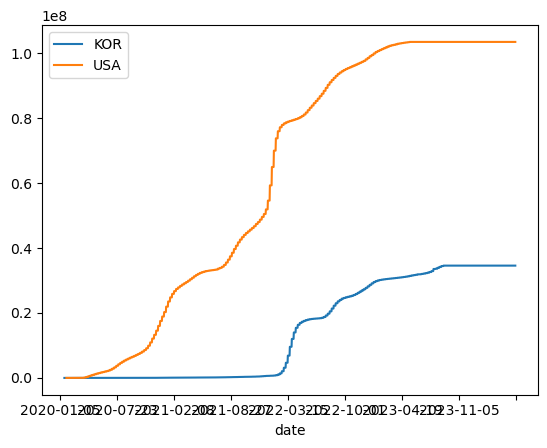

In [33]:
# 그래프 확인
df.plot.line()

In [34]:
# nan값 날리기
# df.dropna(inplace = True)
# df

In [35]:
# nan값 0으로 치환
df.fillna(0, inplace = True)
df

,KOR,USA
date,,
2020-01-05,0.0,0.0
2020-01-06,0.0,0.0
2020-01-07,0.0,0.0
2020-01-08,0.0,0.0
2020-01-09,0.0,0.0
...,...,...
2024-05-15,34571873.0,103436829.0
2024-05-16,34571873.0,103436829.0
2024-05-17,34571873.0,103436829.0


<Axes: xlabel='date'>

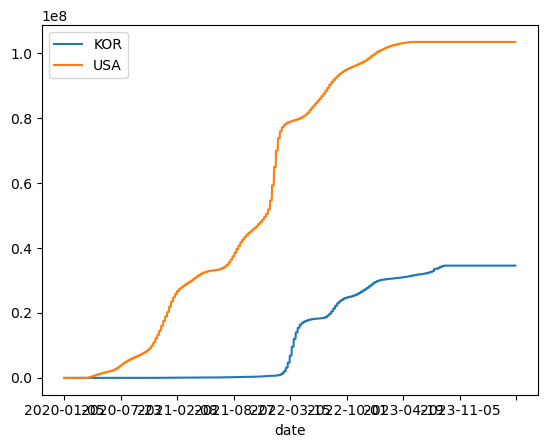

In [36]:
# 그래프 다시 확인
df.plot.line()

<Axes: xlabel='date'>

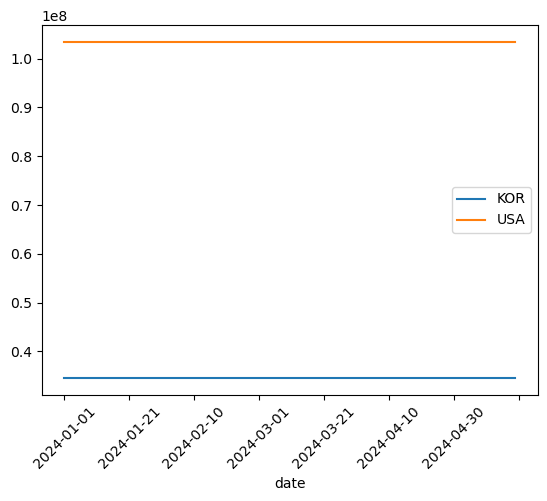

In [41]:
# 올해 그래프 그리기
# 겹치는 글자때문에 돌리기
df['2024-01-01':].plot.line(rot=45)
# 올해껀 의미 없음

<Axes: xlabel='date'>

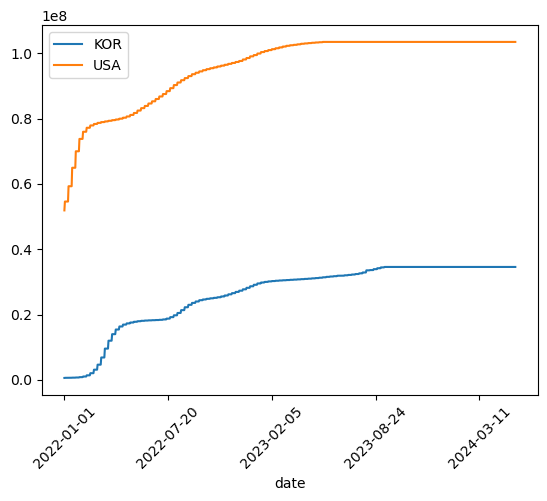

In [42]:
# 22년도부터 그래프 그리기
df['2022-01-01':].plot.line(rot=45)

In [43]:
# 인구 확인
kp = kdf['population']['2022-01-01']
up = udf['population']['2022-01-01']

print('미국 인구(', up, ')/ 대한민국 인구(', kp, ')')


미국 인구( 338289856.0 )/ 대한민국 인구( 51815808.0 )


In [44]:
# 인구 비율 구하기
# round(, 2)는 반올림, 2는 둘째 자리까지 표현
rate = round((up / kp), 2)
rate


6.53

In [45]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
fdf = pd.DataFrame({
'KOR': ktc * rate, # 비율 반영
'USA': utc
}, index=kdf.index
)

#데이터 확인하기
fdf

,KOR,USA
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2024-05-15,2.257543e+08,103436829.0
2024-05-16,2.257543e+08,103436829.0
2024-05-17,2.257543e+08,103436829.0


<Axes: xlabel='date'>

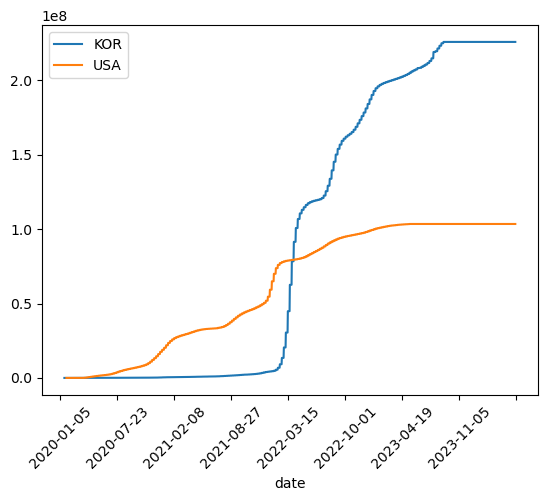

In [51]:
fdf.plot.line(rot=45)

<Axes: xlabel='date'>

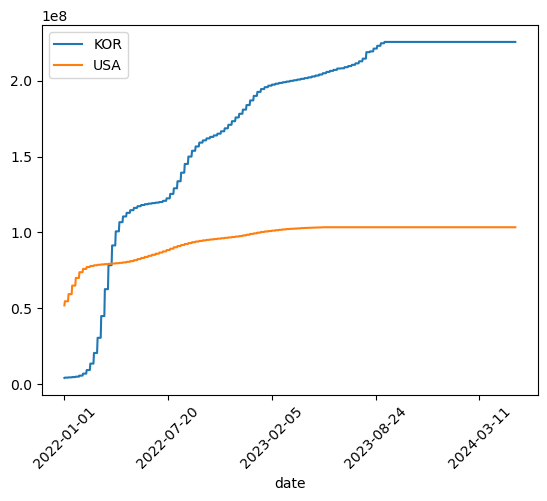

In [52]:
# 2022년 2월 초부터 급격히 상승세 : 오미크론 변이 바이러스 출현 때문
fdf['2022-01-01':].plot.line(rot=45)

In [ ]:
# 확진자 비율 : 대한민국 > 미국
# 안나가 있는 지역은 하와이 주, 인구 140만 명으로 미국 인구의 약 0.42%
# 미국 전체 데이터로 결과를 확정하는 것은 정확한 데이터로 볼 수 없음
# 다음 장에서 하와이 주의 데이터를 확보하여 동일한 선 그래프로 표현
